In [7]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

In [2]:
# Load all the training and testing data
X_train = pd.read_pickle('X_train.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_test = pd.read_pickle('y_test.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [3]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()

dt_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test) 

gini_results = confusion_matrix(y_test, y_pred_gini)
gini_accuracy_score = accuracy_score(y_test, y_pred_gini)
gini_error = zero_one_loss(y_test, y_pred_gini)
gini_report = classification_report(y_test, y_pred_gini)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

In [4]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("Gini Index Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{gini_results[0]}")
print(f"{gini_results[1]} \n")

print("Report :")
print(gini_report) 

print(f"True Postive   : {gini_results[0][0]}")
print(f"False Positive : {gini_results[0][1]}")
print(f"False Negative : {gini_results[1][0]}")
print(f"True Negative  : {gini_results[1][1]}")
print(f"Error Value    : {gini_error}")
print(f"Accuracy_Score : {gini_accuracy_score}")
print("=================================================")


Total time: 307.1148 seconds 

Gini Index Results
Confusion Matrix:
[3831681  184989]
[140925 683578] 

Report :
              precision    recall  f1-score   support

           0       0.96      0.95      0.96   4016670
           1       0.79      0.83      0.81    824503

    accuracy                           0.93   4841173
   macro avg       0.88      0.89      0.88   4841173
weighted avg       0.93      0.93      0.93   4841173

True Postive   : 3831681
False Positive : 184989
False Negative : 140925
True Negative  : 683578
Error Value    : 0.06732128763008471
Accuracy_Score : 0.9326787123699153


In [8]:
feature_importances = pd.Series(dt_gini.feature_importances_, index=X_test.columns)
print('Feature importances sorted:')
print('---------------------------------')
feature_importances.nlargest(80)

Feature importances sorted:
---------------------------------


Dst Port             0.439566
Subflow Fwd Byts     0.324464
Flow Duration        0.138137
Init Fwd Win Byts    0.069601
Flow IAT Min         0.016266
Bwd Pkt Len Mean     0.011967
ECE Flag Cnt         0.000000
Fwd Byts/b Avg       0.000000
Bwd Seg Size Avg     0.000000
Fwd Seg Size Avg     0.000000
Pkt Size Avg         0.000000
Down/Up Ratio        0.000000
CWE Flag Count       0.000000
Fwd Blk Rate Avg     0.000000
URG Flag Cnt         0.000000
ACK Flag Cnt         0.000000
PSH Flag Cnt         0.000000
RST Flag Cnt         0.000000
SYN Flag Cnt         0.000000
FIN Flag Cnt         0.000000
Pkt Len Var          0.000000
Pkt Len Std          0.000000
Fwd Pkts/b Avg       0.000000
Bwd Pkts/b Avg       0.000000
Bwd Byts/b Avg       0.000000
Active Mean          0.000000
Idle Max             0.000000
Idle Std             0.000000
Idle Mean            0.000000
Active Min           0.000000
Active Max           0.000000
Active Std           0.000000
Fwd Seg Size Min     0.000000
Pkt Len Ma

Top 40 features:
---------------------------------
Dst Port             0.439566
Subflow Fwd Byts     0.324464
Flow Duration        0.138137
Init Fwd Win Byts    0.069601
Flow IAT Min         0.016266
Bwd Pkt Len Mean     0.011967
Protocol             0.000000
Timestamp            0.000000
Tot Fwd Pkts         0.000000
Tot Bwd Pkts         0.000000
TotLen Fwd Pkts      0.000000
TotLen Bwd Pkts      0.000000
Fwd Pkt Len Max      0.000000
Fwd Pkt Len Min      0.000000
Fwd Pkt Len Mean     0.000000
Fwd Pkt Len Std      0.000000
Bwd Pkt Len Max      0.000000
Bwd Pkt Len Min      0.000000
Bwd Pkt Len Std      0.000000
Flow Byts/s          0.000000
Flow Pkts/s          0.000000
Flow IAT Mean        0.000000
Flow IAT Std         0.000000
Flow IAT Max         0.000000
Fwd IAT Tot          0.000000
Fwd IAT Mean         0.000000
Fwd IAT Std          0.000000
Fwd IAT Max          0.000000
Fwd IAT Min          0.000000
Bwd IAT Tot          0.000000
Bwd IAT Mean         0.000000
Bwd IAT Std        

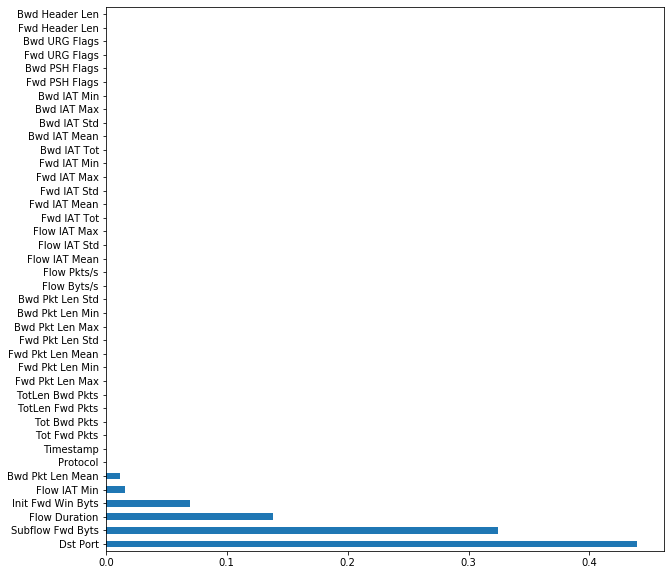

In [10]:
print('Top 40 features:')
print('---------------------------------')
feature_importances.nlargest(40).plot(kind='barh', figsize=(10,10))
print(feature_importances.nlargest(40))

Least 40 features:
---------------------------------
Protocol            0.0
Timestamp           0.0
Tot Fwd Pkts        0.0
Tot Bwd Pkts        0.0
TotLen Fwd Pkts     0.0
TotLen Bwd Pkts     0.0
Fwd Pkt Len Max     0.0
Fwd Pkt Len Min     0.0
Fwd Pkt Len Mean    0.0
Fwd Pkt Len Std     0.0
Bwd Pkt Len Max     0.0
Bwd Pkt Len Min     0.0
Bwd Pkt Len Std     0.0
Flow Byts/s         0.0
Flow Pkts/s         0.0
Flow IAT Mean       0.0
Flow IAT Std        0.0
Flow IAT Max        0.0
Fwd IAT Tot         0.0
Fwd IAT Mean        0.0
Fwd IAT Std         0.0
Fwd IAT Max         0.0
Fwd IAT Min         0.0
Bwd IAT Tot         0.0
Bwd IAT Mean        0.0
Bwd IAT Std         0.0
Bwd IAT Max         0.0
Bwd IAT Min         0.0
Fwd PSH Flags       0.0
Bwd PSH Flags       0.0
Fwd URG Flags       0.0
Bwd URG Flags       0.0
Fwd Header Len      0.0
Bwd Header Len      0.0
Fwd Pkts/s          0.0
Bwd Pkts/s          0.0
Pkt Len Min         0.0
Pkt Len Max         0.0
Pkt Len Mean        0.0
Pkt Len Std

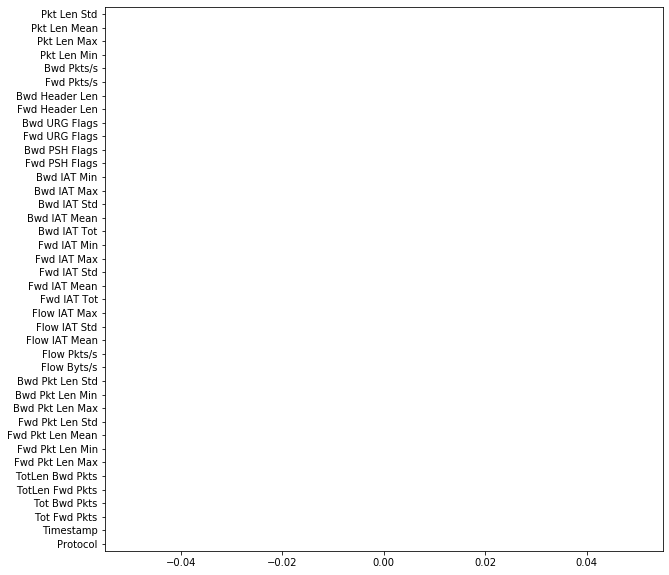

In [11]:
print('Least 40 features:')
print('---------------------------------')
feature_importances.nsmallest(40).plot(kind='barh', figsize=(10,10))
print(feature_importances.nsmallest(40))